<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Load_and_Preprocess_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np 
import os
import PIL
import PIL.Image
import tensorflow as tf 
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [11]:
import pathlib
from pathlib import Path

flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=flowers_url,fname="flower_photos",untar = True)
data_dir = Path(data_dir)

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count) 
#Total of 3 thousand six hundred and seventy images downloaded

3670


In [13]:
roses = list(data_dir.glob('roses/*'))


len(roses)
#PIL.Image.open(str(roses[0]))

641

In [14]:
#Define the dataset parameters
image_height =180
image_width = 180
image_batch = 32

In [15]:
#Load the image off disk using keras utility
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset="training",
    seed = 123,
    validation_split = 0.2,
    image_size = (image_width,image_height),
    batch_size =image_batch
    )

#Load the validation data
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset = "validation",
    seed = 123,
    validation_split=0.2,
    image_size = (image_width,image_height),
    batch_size = image_batch
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


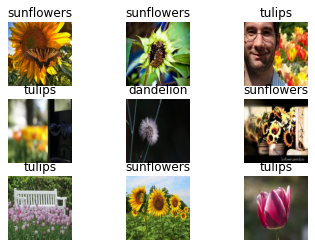

In [18]:
#Visualize the data to check whether the data is labeled correctly
for images,labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [19]:
#Lets manually iterate over the dataset and retrieve the batch images
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


RGB channel(3) this means that the image has 3 channels, so we have to standardize or normalize the data before we pass them to our neural network. Normalization means turning the values to be floating point numbers in between zero and one [0,1] 

In [20]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))

In [21]:
for image,label in normalized_ds.take(1):
  print(np.max(image))
  print(np.min(image))
  #print(image)

1.0
0.0


Load and preprocess images

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from pathlib import Path 
import PIL.Image 

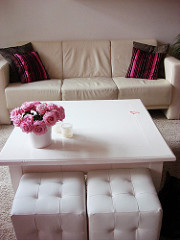

In [23]:
flower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(fname="flower_photos",origin=flower_url,untar=True)
data_dir = Path(data_dir)
roses = list(data_dir.glob("roses/*"))
PIL.Image.open(str(roses[7]))

In [24]:
image_width = 180
image_height = 180
image_size = (image_width,image_height)
batch = 32 
#Load the data from disk
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset = "training",
    seed = 123,
    validation_split = 0.2,
    image_size = image_size,
    batch_size = batch
    )

test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset = "validation",
    seed = 123,
    validation_split = 0.2,
    image_size = image_size,
    batch_size = batch
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


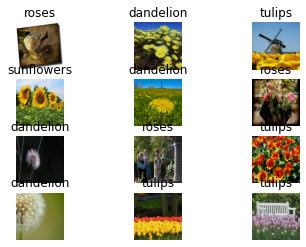

In [25]:
class_names = train_dataset.class_names
#Visualize the data before building the computational graph
for images,labels in train_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(4,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
#Normalize the data before training 
#normalized_layer = tf.keras.layers.Rescaling(1./255.0)
#train_dataset = train_dataset.map(lambda x,y: (normalized_layer(x),y))

In [27]:
#Check whether the data has been normalized

for batch,(x,y) in enumerate(train_dataset):
  print(x.shape)
  print(np.min(x))
  break

(32, 180, 180, 3)
0.0


In [56]:



#Configure the dataset for performance 
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


#train_dataset = train_dataset[...,tf.newaxis].astype("float32")
#test_dataset = test_dataset[...,tf.newaxis].astype("float32")

#Define a model and train 

reg = 0.1

class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    #Conv Block 1
    self.rescale = tf.keras.layers.Rescaling(1./255)
    self.conv1 = tf.keras.layers.Conv2D(16,(2,2),activation="relu",kernel_regularizer=tf.keras.regularizers.L2(l2=reg),padding="same")
    self.maxp1 = tf.keras.layers.MaxPool2D((2,2))

    #Conv Block 2
    self.conv2 = tf.keras.layers.Conv2D(32,(2,2),activation="relu",kernel_regularizer=tf.keras.regularizers.L2(l2=reg),padding="same")
    self.maxp2 = tf.keras.layers.MaxPool2D((2,2))
    

    #Conv Block 3
    self.conv3 = tf.keras.layers.Conv2D(64,(2,2),activation="relu",kernel_regularizer=tf.keras.regularizers.L2(l2=reg),padding="same")
    self.maxp3 = tf.keras.layers.MaxPool2D((2,2))
    
    #Conv Block 4
    self.conv4 = tf.keras.layers.Conv2D(128,(2,2),activation="elu",kernel_regularizer = tf.keras.regularizers.L2(l2=reg),kernel_initializer="he_normal",padding="same")
    self.maxp4 = tf.keras.layers.MaxPool2D((2,2))
    
    #Conv Block 5
    self.conv5 = tf.keras.layers.Conv2D(256,(2,2),kernel_regularizer=tf.keras.regularizers.L2(l2= reg),activation="elu",kernel_initializer="he_normal",padding="same")
    self.maxp5 = tf.keras.layers.MaxPool2D((2,2))
    
    
    #self.GlobalP=tf.keras.layers.GlobalAveragePooling2D()
    self.flatten = tf.keras.layers.Flatten()
    self.batchnorm = tf.keras.layers.BatchNormalization()
    self.dense1 = tf.keras.layers.Dense(300,kernel_initializer="he_normal")
    self.activ1 = tf.keras.layers.Activation("elu")
    self.drop1 = tf.keras.layers.Dropout(0.3)
    self.dense2 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ2 = tf.keras.layers.Activation("elu")
    self.dense3 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ3 = tf.keras.layers.Activation("elu")
    self.dense4 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ4 = tf.keras.layers.Activation("elu")
    self.dense5 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ5 = tf.keras.layers.Activation("elu")
    self.dense6 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ6 = tf.keras.layers.Activation("elu")
    self.dense7 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ7 = tf.keras.layers.Activation("elu")
    self.dense8 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ8 = tf.keras.layers.Activation("elu")
    self.dense9 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ9 = tf.keras.layers.Activation("elu")
    self.dense10 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ10 = tf.keras.layers.Activation("elu")
    self.dense11 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ11 = tf.keras.layers.Activation("elu")
    self.dense12 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ12 = tf.keras.layers.Activation("elu")
    self.dense13 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ13 = tf.keras.layers.Activation("elu")
    self.dense14 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ14 = tf.keras.layers.Activation("elu")
    self.dense15  = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ15 = tf.keras.layers.Activation("elu")
    self.dense16 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ16 = tf.keras.layers.Activation("elu")
    self.dense17 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ17 = tf.keras.layers.Activation("elu")
    self.dense18 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ18 = tf.keras.layers.Activation("elu")
    self.dense19 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ19 = tf.keras.layers.Activation("elu")
    self.dense20 = tf.keras.layers.Dense(200,kernel_initializer="he_normal")
    self.activ20 = tf.keras.layers.Activation("elu")
    self.batchnorm1 = tf.keras.layers.BatchNormalization()
    self.output1 = tf.keras.layers.Dense(5)  

  def call(self,x):
    x = self.rescale(x)
    x = self.conv1(x)
    x = self.maxp1(x)
    
    x = self.conv2(x)
    x = self.maxp2(x)

    x = self.conv3(x)
    x = self.maxp3(x)

    x = self.conv4(x)
    x = self.maxp4(x)

    x = self.conv5(x)
    x = self.maxp5(x)

    #x = self.GlobalP(x)
    x = self.flatten(x)
    x = self.batchnorm(x)
    x = self.dense1(x)
    x = self.activ1(x)
    x = self.drop1(x)
    x = self.dense2(x)
    x = self.activ2(x)
    x = self.dense3(x)
    x = self.activ3(x)
    x = self.dense4(x)
    x = self.activ4(x)
    x = self.dense5(x)
    x = self.activ5(x)
    x = self.dense6(x)
    x = self.activ6(x)
    x = self.dense7(x)
    x = self.activ7(x)
    x = self.dense8(x)
    x = self.activ8(x)
    x = self.dense9(x)
    x = self.activ9(x)
    x = self.dense10(x)
    x = self.activ10(x)
    x = self.dense11(x)
    x = self.activ11(x)
    x = self.dense12(x)
    x = self.activ12(x)
    x = self.dense13(x)
    x = self.activ13(x)
    x = self.dense14(x)
    x = self.activ14(x)
    x = self.dense15(x)
    x = self.activ15(x)
    x = self.dense16(x)
    x = self.activ16(x)
    x = self.dense17(x)
    x = self.activ17(x)
    x = self.dense18(x)
    x = self.activ18(x)
    x = self.dense19(x)
    x = self.activ19(x)
    x = self.dense20(x)
    x = self.activ20(x)
    x = self.batchnorm1(x)
    x = self.output1(x)
    return x


model = NeuralNetwork()


In [57]:
#Define the hyperparameters
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="training Accuracy")
train_loss = tf.keras.metrics.Mean(name="training loss")


test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = "test Accuracy")
test_loss = tf.keras.metrics.Mean(name = "testing Loss")


#Define the training loop 
@tf.function
def train_step(images,labels):
  with tf.GradientTape() as tape:
    predictions = model(images,training=True)
    loss = loss_fn(labels,predictions)
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  train_loss(loss) 
  train_accuracy(labels,predictions)

#Testing loop
@tf.function 
def test_step(images,labels):
  predictions = model(images,training =False)
  loss = loss_fn(labels,predictions)

  test_loss(loss)
  test_accuracy(labels,predictions)

In [58]:
#Train the mode
EPOCHS = 200
for epoch in range(EPOCHS):
  #Reset the metrics
  train_accuracy.reset_states()
  train_loss.reset_states()

  test_accuracy.reset_states()
  test_loss.reset_states()

  for images,labels in train_dataset:
    train_step(images,labels)

  for images,labels in test_dataset:
    test_step(images,labels)

  print(f"Train Accuracy:{train_accuracy.result()}, Train Loss:{train_loss.result()}\n")
  print(f"Test Accuracy:{test_accuracy.result()}, Test Loss:{test_loss.result()}\n")

Train Accuracy:0.42336511611938477, Train Loss:1.3885619640350342

Test Accuracy:0.36784741282463074, Test Loss:1.4499584436416626

Train Accuracy:0.5354223251342773, Train Loss:1.1523828506469727

Test Accuracy:0.31062671542167664, Test Loss:1.7086448669433594

Train Accuracy:0.5841280817985535, Train Loss:1.0427300930023193

Test Accuracy:0.3937329649925232, Test Loss:1.4575072526931763

Train Accuracy:0.6175068020820618, Train Loss:0.9654176235198975

Test Accuracy:0.5667575001716614, Test Loss:1.0756596326828003

Train Accuracy:0.6379427909851074, Train Loss:0.9113283753395081

Test Accuracy:0.4945504069328308, Test Loss:1.4684735536575317

Train Accuracy:0.6559945344924927, Train Loss:0.8884081840515137

Test Accuracy:0.30245232582092285, Test Loss:40.68672180175781

Train Accuracy:0.6600817441940308, Train Loss:0.8992818593978882

Test Accuracy:0.24659401178359985, Test Loss:4.340338230133057

Train Accuracy:0.708106279373169, Train Loss:0.7829042673110962

Test Accuracy:0.510899

Using tf.data for finer control

In [63]:
list_dataset = tf.data.Dataset.list_files(str(data_dir/"*/*"),shuffle =False)
list_dataset = list_dataset.shuffle(image_count,reshuffle_each_iteration=False)

for f in list_dataset.take(5):
  print(f.numpy())

b'/root/.keras/datasets/flower_photos/daisy/11124324295_503f3a0804.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/9293460423_7fbb1e3c32_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/3210019014_1bbd8bff20_n.jpg'
b'/root/.keras/datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/58636535_bc53ef0a21_m.jpg'


Using TF.Data for finer control